In [88]:
# Performing K-Means Clustering to Separetes Customers based on the Data

# Understanding the data
# Finding the Optimal Clusters
# Training the Model using K-Means
# Plotiing the Clusters

In [89]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df = pd.read_csv('Mall_Customers.csv')

In [91]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [92]:
df.shape

(200, 5)

In [93]:
# Checking for the Null values in the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [94]:
# Taking out the columns Annual Income and Spending Score for Clustering
X = df.iloc[:,[3,4]].values

In [95]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [96]:
# Finding Optimal number of clusters

from sklearn.cluster import KMeans
wcss = [] # WCSS (Within-Cluster Sum of Square). 
# WCSS is the sum of the squared distance between each point and the centroid in a cluster.

In [97]:
for i in range(1,15):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,15),wcss)
plt.title("The Elbow Method")
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS values')
plt.show()

In [98]:
# Training the Model
kmeans_model = KMeans(n_clusters = 5, init='k-means++',random_state=0)

In [99]:
y_kmeans = kmeans_model.fit_predict(X)

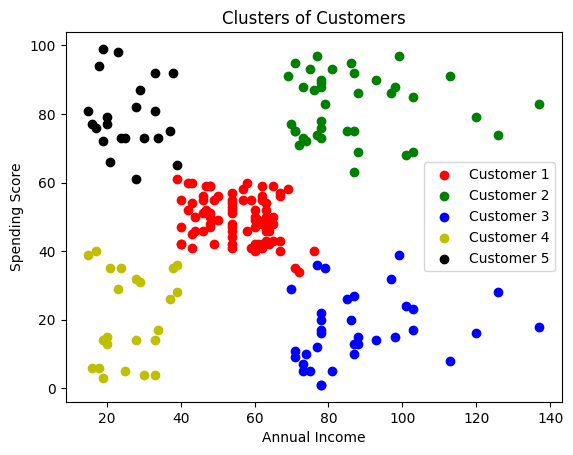

In [100]:
plt.scatter(X[y_kmeans ==0,0],X[y_kmeans == 0,1],c='r',label='Customer 1')
plt.scatter(X[y_kmeans ==1,0],X[y_kmeans == 1,1],c='g',label='Customer 2')
plt.scatter(X[y_kmeans ==2,0],X[y_kmeans == 2,1],c='b',label='Customer 3')
plt.scatter(X[y_kmeans ==3,0],X[y_kmeans == 3,1],c='y',label='Customer 4')
plt.scatter(X[y_kmeans ==4,0],X[y_kmeans == 4,1],c='k',label='Customer 5')
plt.title("Clusters of Customers")
plt.xlabel('Annual Income')
plt.ylabel("Spending Score")
plt.legend()
plt.show()

In [102]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Sample data: UserID, ItemID, Rating
data = {
    'userID': [1, 1, 2, 2, 3, 3, 4, 4],
    'itemID': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'D'],
    'rating': [5, 3, 4, 2, 5, 4, 3, 5]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Define the format of the data
reader = Reader(rating_scale=(1, 5))

# Load the data into Surprise
dataset = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(dataset, test_size=0.25)

# Use SVD for matrix factorization
model = SVD()

# Train the model
model.fit(trainset)

# Make predictions
predictions = model.test(testset)

# Evaluate the model
accuracy.rmse(predictions)

# Example of making a prediction for a specific user and item
user_id = 1
item_id = 'C'
pred = model.predict(user_id, item_id)
print(f'Predicted rating for user {user_id} on item {item_id}: {pred.est:.2f}')


ModuleNotFoundError: No module named 'surprise'